In [46]:
import numpy as np
from matplotlib import pyplot as plt
from ts_modelling.data_producer import DataProducer
from ts_modelling.simple_experiment import SimpleExp
from argparse import Namespace
import yaml
import torch
%matplotlib inline

with open('args.yaml', 'r') as file:
    config = yaml.safe_load(file)
args = Namespace(**config)
exp = SimpleExp(args)

length = 5000

Use CPU
supervised head


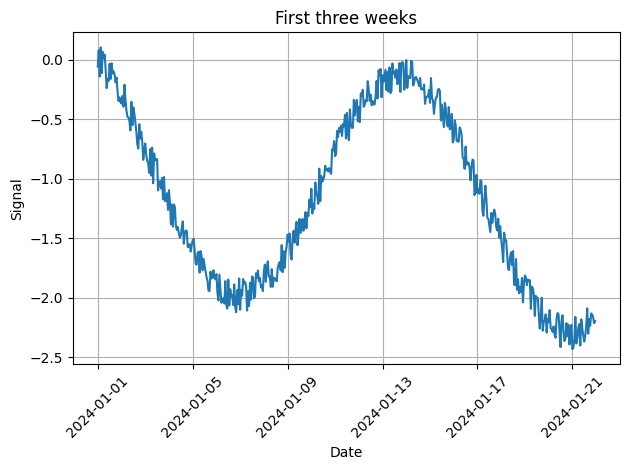

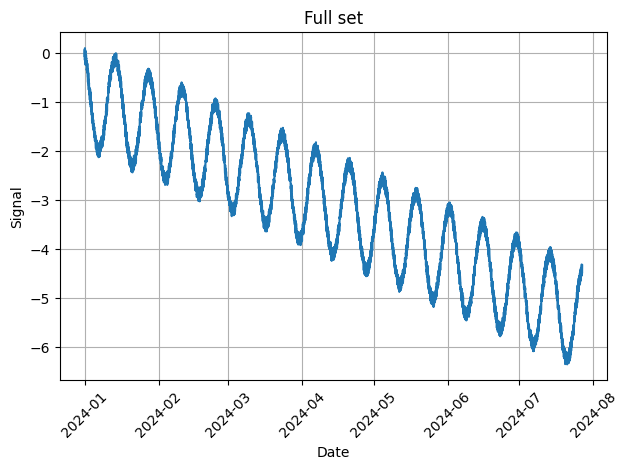

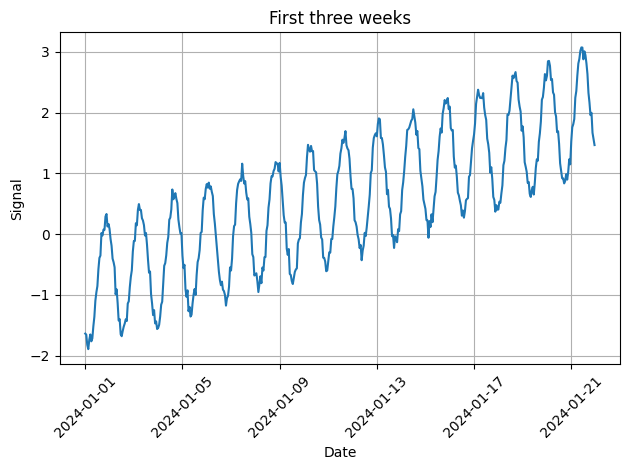

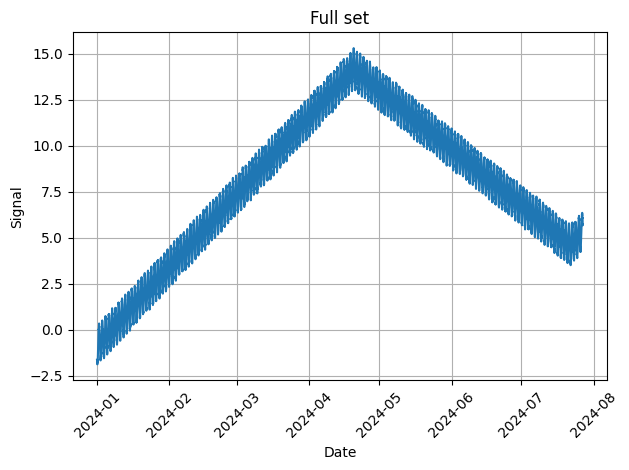

In [43]:
dp = DataProducer(length=length, n_vars=1, path=args.root_path, noise_amp=0.3)
dp.add_sine([(1/336, 1)])
dp.add_trend(1, 1/336)
dp.plot_data()
dp.generate_csv()

dp = DataProducer(length=length, n_vars=1, path=args.root_path, noise_amp=0.3)
dp.add_sine([(10/336, 1)])
dp.add_trend(3, 2/336)
dp.plot_data()
dp.generate_csv(data_path='test_data.csv')

In [47]:
exp.pretrain_model()
exp.train_predict_head()
exp.finetune_model()

Pretraining: PTST_train_even_test_odd on data: custom.csv for 3 epochs
Trainable parameters:      669324
Total parameters:          669329
Training on data: custom.csv
train 2974
val 310
test 809
Validation loss decreased (inf --> 0.003327).  Saving model ...
Updating learning rate to 8.384944848714742e-05
EarlyStopping counter: 1 out of 15
Updating learning rate to 2.961724421283721e-05
EarlyStopping counter: 2 out of 15
Updating learning rate to 4.398794120766649e-09
Total training time: 0 minutes 49.354506969451904 seconds
Training pred head: PTST_train_even_test_odd on data: custom.csv for 3 epochs
Trainable parameters:      712896
Total parameters:         1380677
Training on data: custom.csv
train 2974
val 310
test 809
Validation loss decreased (inf --> 0.076270).  Saving model ...
Updating learning rate to 8.384944848714742e-05
Validation loss decreased (0.076270 --> 0.055730).  Saving model ...
Updating learning rate to 2.961724421283721e-05
Validation loss decreased (0.055730 

In [48]:
exp.test('test_data.csv')

test 809
Testing PTST_train_even_test_odd on test_data.csv


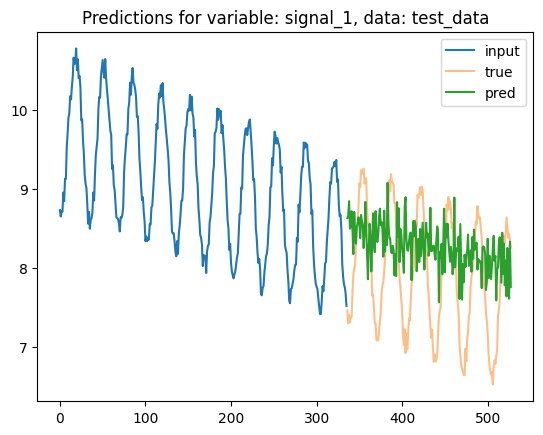

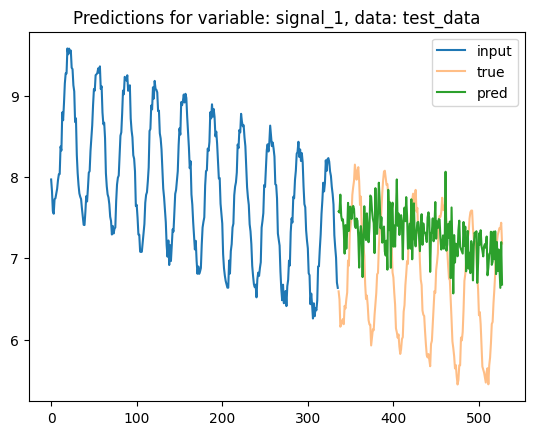

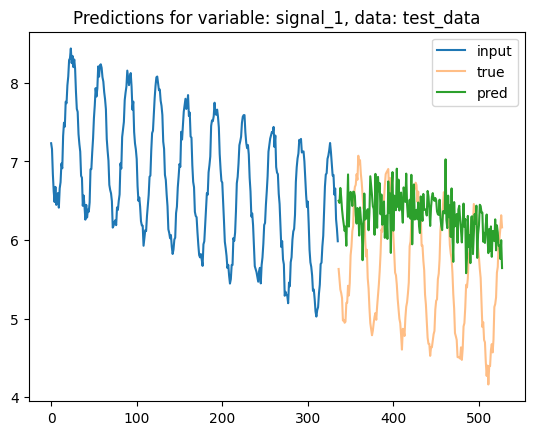

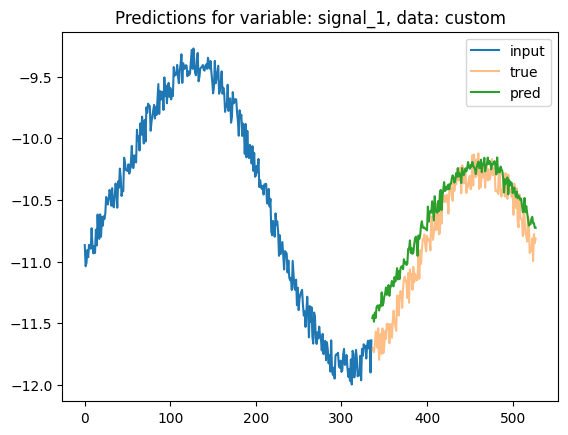

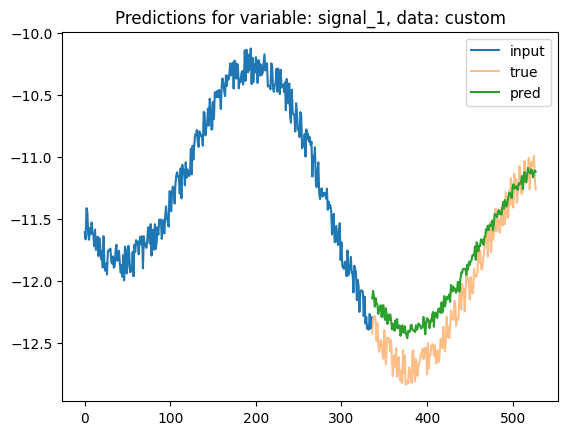

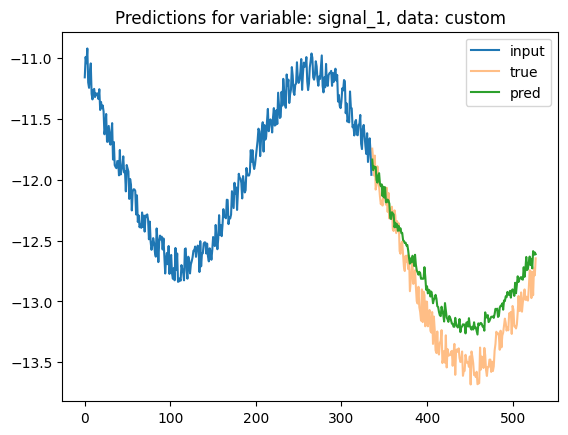

In [49]:
exp.plot_preds()

In [54]:
dirr = './test_results/PTST_train_even_test_odd/input_pred_true/test_data'
preds = np.load(dirr + '/pred.npy')
trues = np.load(dirr + '/true.npy')
inputs = np.load(dirr + '/input.npy')

In [88]:
np.var(preds-trues)/np.var(trues)

0.4419043

In [55]:
res = preds-trues  

In [56]:
from scipy import stats
slopes = []
for i in range(len(res[:,0,0])):
    signal = res[i,:,0]
    result = stats.linregress(np.arange(0, len(signal)), signal)
    slopes.append(result.slope)
    

TODO: 
- analyse "*foundation*"-model experiment 
- build resiudal analysis tool using:
    - trend
        - coefficients? 
        - p-value? 
        - intercept?
    - frequency
        - average?
        - top x frequencies
        - plot   
    - ACF and PACF
        - average?
        - top x lags
        - plot
    - overall: how to handle large number of pred_len long resiudals
- conduct Amins experiment:
    - create a dataset A consisting of 50 frequencies
    - create another dataset B with 50 frequencies, sharing 20% of the freq
    - train on A, test on B


In [39]:
type(fft_result)

numpy.ndarray

In [81]:
len()

192

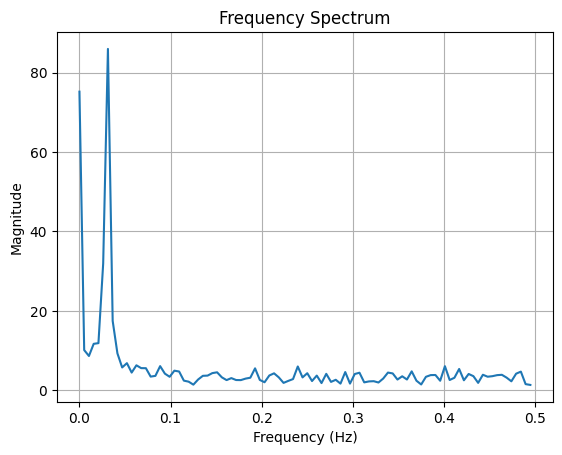

In [82]:
plt.figure()
n = len(res[0,:,0])
frequency = np.fft.fftfreq(n)
fft_results = []
for i in range(len(res[:,0,0])):
    signal = res[i,:,0]
    fft_results.append(np.abs(np.fft.fft(signal)))
    
    

fft_result = np.average(fft_results, axis=0)
plt.plot(frequency[:n//2], fft_result[:n//2])
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

Five largest values and corresponding lags for PACF:
Lag: 61, PACF: 0.0756089205932933
Lag: 96, PACF: 0.11633363874787263
Lag: 94, PACF: -0.018673737888184827
Lag: 92, PACF: -0.1674576202404246
Lag: 70, PACF: 0.4749934079334245


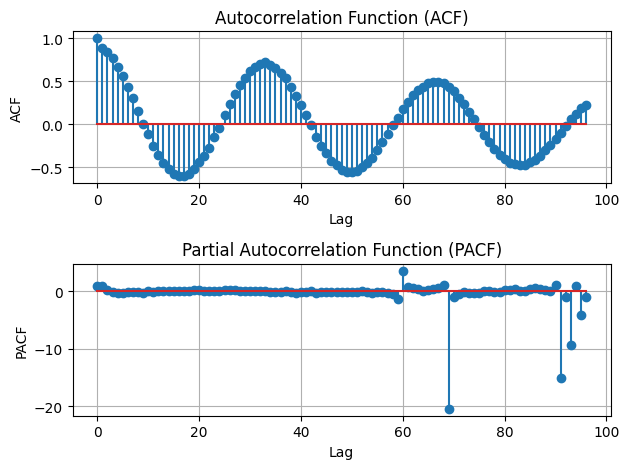

In [83]:
import statsmodels.api as sm
acf = sm.tsa.acf(signal, nlags=len(signal)//2)
pacf = sm.tsa.pacf(signal, nlags=len(signal)//2)

largest_indices_acf = np.argpartition(np.abs(pacf[1:]), -5)[-5:]
largest_lags_acf = largest_indices_acf + 2  # Since lag starts from 1 and first is zero lag which is just variance
largest_values_acf = acf[largest_indices_acf]
print("Five largest values and corresponding lags for PACF:")
for lag, value in zip(largest_lags_acf, largest_values_acf):
    print(f"Lag: {lag}, PACF: {value}")


# Plot ACF and PACF
plt.figure()

# ACF plot
plt.subplot(2, 1, 1)
plt.stem(acf)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid(True)

# PACF plot
plt.subplot(2, 1, 2)
plt.stem(pacf)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.grid(True)

plt.tight_layout()
plt.show()

In [4]:
exp.args.training_task = 'supervised'
exp.train()

Trainable parameters:	712896
Total parameters:		817857
train 2973
val 309
test 809
Validation loss decreased (inf --> 0.017844).  Saving model ...
Updating learning rate to 9.999964010416366e-05
Validation loss decreased (0.017844 --> 0.001809).  Saving model ...
Updating learning rate to 9.69194207852955e-05
Validation loss decreased (0.001809 --> 0.000900).  Saving model ...
Updating learning rate to 8.818005098577033e-05
Validation loss decreased (0.000900 --> 0.000711).  Saving model ...
Updating learning rate to 7.483562768277244e-05
epoch: 5, train loss: 0.015703, validation loss: 0.00052858, test loss: 0.00049945
epoch time: 1.6927330493927002
Validation loss decreased (0.000711 --> 0.000529).  Saving model ...
Updating learning rate to 5.849568526935634e-05
Validation loss decreased (0.000529 --> 0.000437).  Saving model ...
Updating learning rate to 4.113106195244662e-05
Validation loss decreased (0.000437 --> 0.000281).  Saving model ...
Updating learning rate to 2.4836187578

Model(
  (model): PatchTST_backbone(
    (revin_layer): RevIN()
    (padding_patch_layer): ReplicationPad1d((0, 12))
    (backbone): TSTiEncoder(
      (W_P): Linear(in_features=12, out_features=128, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (encoder): TSTEncoder(
        (layers): ModuleList(
          (0): TSTEncoderLayer(
            (self_attn): _MultiheadAttention(
              (W_Q): Linear(in_features=128, out_features=128, bias=True)
              (W_K): Linear(in_features=128, out_features=128, bias=True)
              (W_V): Linear(in_features=128, out_features=128, bias=True)
              (sdp_attn): _ScaledDotProductAttention(
                (attn_dropout): Dropout(p=0.0, inplace=False)
              )
              (to_out): Sequential(
                (0): Linear(in_features=128, out_features=128, bias=True)
                (1): Dropout(p=0.3, inplace=False)
              )
            )
            (dropout_attn): Dropout(p=0.3, inplace=False)
  

In [5]:
for param in exp.model.model.backbone.parameters():
    param.requires_grad = True

exp.train()

Trainable parameters:	817857
Total parameters:		817857
train 2973
val 309
test 809
Validation loss decreased (inf --> 0.001132).  Saving model ...
Updating learning rate to 9.999964010416366e-05
Validation loss decreased (0.001132 --> 0.000965).  Saving model ...
Updating learning rate to 9.69194207852955e-05
Validation loss decreased (0.000965 --> 0.000880).  Saving model ...
Updating learning rate to 8.818005098577033e-05
Validation loss decreased (0.000880 --> 0.000568).  Saving model ...
Updating learning rate to 7.483562768277244e-05
epoch: 5, train loss: 0.0081161, validation loss: 0.00041399, test loss: 0.00039396
epoch time: 3.291706085205078
Validation loss decreased (0.000568 --> 0.000414).  Saving model ...
Updating learning rate to 5.849568526935634e-05
Validation loss decreased (0.000414 --> 0.000299).  Saving model ...
Updating learning rate to 4.113106195244662e-05
Validation loss decreased (0.000299 --> 0.000185).  Saving model ...
Updating learning rate to 2.4836187578

Model(
  (model): PatchTST_backbone(
    (revin_layer): RevIN()
    (padding_patch_layer): ReplicationPad1d((0, 12))
    (backbone): TSTiEncoder(
      (W_P): Linear(in_features=12, out_features=128, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (encoder): TSTEncoder(
        (layers): ModuleList(
          (0): TSTEncoderLayer(
            (self_attn): _MultiheadAttention(
              (W_Q): Linear(in_features=128, out_features=128, bias=True)
              (W_K): Linear(in_features=128, out_features=128, bias=True)
              (W_V): Linear(in_features=128, out_features=128, bias=True)
              (sdp_attn): _ScaledDotProductAttention(
                (attn_dropout): Dropout(p=0.0, inplace=False)
              )
              (to_out): Sequential(
                (0): Linear(in_features=128, out_features=128, bias=True)
                (1): Dropout(p=0.3, inplace=False)
              )
            )
            (dropout_attn): Dropout(p=0.3, inplace=False)
  

In [19]:
total_params = 20000000
trainable_params = 900000
print(f"{'Trainable parameters:': <{25}}{trainable_params:>10}")
print(f"{'Total parameters:': <{25}}{total_params:>10}")


Trainable parameters:        900000
Total parameters:          20000000


In [20]:
exp.model

Model(
  (model): PatchTST_backbone(
    (revin_layer): RevIN()
    (padding_patch_layer): ReplicationPad1d((0, 12))
    (backbone): TSTiEncoder(
      (W_P): Linear(in_features=12, out_features=128, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (encoder): TSTEncoder(
        (layers): ModuleList(
          (0): TSTEncoderLayer(
            (self_attn): _MultiheadAttention(
              (W_Q): Linear(in_features=128, out_features=128, bias=True)
              (W_K): Linear(in_features=128, out_features=128, bias=True)
              (W_V): Linear(in_features=128, out_features=128, bias=True)
              (sdp_attn): _ScaledDotProductAttention(
                (attn_dropout): Dropout(p=0.0, inplace=False)
              )
              (to_out): Sequential(
                (0): Linear(in_features=128, out_features=128, bias=True)
                (1): Dropout(p=0.3, inplace=False)
              )
            )
            (dropout_attn): Dropout(p=0.3, inplace=False)
  